## MAJOR ISSUE with the PLOTS:
#### You always divide by the number of articles but for short article you append 0 sentences until you reach the desired sent_length this is why you have lower frequencies towards the end of the articles

I need a list of article_lengths for each sentence position to normaliz each position by the number of articles of that length!

In [4]:
for publisher in news.keys():
    print(len(news[publisher]['claim']), len(news[publisher]['premise']), len(news[publisher]['none']), end ='\t')
    print(len(op[publisher]['claim']), len(op[publisher]['premise']), len(op[publisher]['none']))
'''
363 363 363	363 363 363
228 228 228	228 228 228
629 629 629	629 629 629
807 807 807	807 807 807
136 136 136	136 136 136
157 157 157	157 157 157
128 128 128	128 128 128
418 418 418	418 418 418
56 56 56	56 56 56
271 271 271	271 271 271'''

363 363 363	363 363 363
228 228 228	228 228 228
629 629 629	629 629 629
807 807 807	807 807 807
136 136 136	136 136 136
157 157 157	157 157 157
128 128 128	128 128 128
418 418 418	418 418 418
56 56 56	56 56 56
271 271 271	271 271 271


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
from collections import defaultdict
import read_and_norm_arg_multipub

### Reading and Normalizing Data

In [2]:
data = read_and_norm_arg_multipub.main(n_sent=40)

In [6]:
len(data['news']['premise']['Digital Journal'])

228

In [3]:
for pub in data['op']['length'].keys():
    print(pub, np.sum(data['op']['length'][pub], axis=0))
print()
for pub in data['news']['length'].keys():
    print(pub, np.sum(data['news']['length'][pub], axis=0))

Californian [363 361 357 352 343 331 318 305 292 281 266 250 240 231 222 212 204 198
 193 190 189 187 181 176 168 165 156 152 142 136 131 121 113 110 105  99
  87  75  68  64]
Digital Journal [228 228 228 228 228 228 228 228 225 222 219 215 212 207 203 199 195 192
 186 179 173 163 155 149 143 133 129 123 117 111 107 105 102  97  92  90
  87  85  83  80]
Enid News [629 629 628 626 625 624 624 624 622 619 611 605 597 574 557 534 513 490
 461 438 418 391 365 338 316 303 285 270 263 247 237 231 220 209 196 183
 174 162 147 136]
Gazette-mail [807 807 807 807 806 804 803 800 794 785 775 772 765 757 746 739 726 713
 700 681 663 641 609 573 536 498 462 422 392 366 328 301 277 253 232 211
 193 181 166 148]
NJSpotlight [136 136 136 136 136 136 136 136 136 136 136 136 135 134 132 132 131 129
 128 127 126 124 118 115 106 103  95  86  74  63  59  52  42  39  32  28
  26  21  15  15]
NW Florida Daily [157 157 157 157 157 157 157 157 157 157 157 157 157 156 156 156 154 153
 149 142 130 113 100  78  6

## Plots to compare publishers

In [4]:
def draw_subplot(ax, publishers, colors, data, y_axis_max, n_y_ticks, n_articles, n_sent, typ, label):
    
    x= np.arange(n_sent)
    
    if len(publishers) == 1 and publishers[0] == 'ALL_PUBLISHERS':
        publishers = sorted(data[typ][label].keys())
    
    assert len(publishers) == len(colors)
    
    for pub, color in zip(publishers, colors):
        
        if n_articles == 0:
            pub_articles = data[typ][label][pub]
            pub_n_articles_per_sent_position = np.sum(data[typ]['length'][pub], axis=0)
            
        elif n_articles > len(data[typ][label][pub]):
            print('n_articles (={}) > total aritcle for publihser: {}, including all {} for this publihser'.
                  format(n_articles, pub, len(data[typ][label][pub])))
            pub_articles = data[typ][label][pub]
            pub_n_articles_per_sent_position = np.sum(data[typ]['length'][pub], axis=0)
            
        else:
            pub_articles = data[typ][label][pub][:n_articles]
            pub_n_articles_per_sent_position = np.sum(data[typ]['length'][pub][:n_articles], axis=0)
        
        pub_articles = np.array([np.array(article[:n_sent]) for article in pub_articles])
        pub_n_articles_per_sent_position = pub_n_articles_per_sent_position[:n_sent]
        
        # changing zeros to ones to avoid dividing by zero in normalization
        pub_n_articles_per_sent_position = [n if n>0 else 1 for n in pub_n_articles_per_sent_position]
        
        pub_sent_freq = pub_articles.sum(axis=0)/pub_n_articles_per_sent_position*100
        
        ax.plot(x, pub_sent_freq, color, label=pub)
        ax.set_ylim(top=y_axis_max+2)
        ax.set_yticks([i*y_axis_max/n_y_ticks for i in range(0,n_y_ticks+1)])
        
#         handles, labels = ax.get_legend_handles_labels()
#         return handles, labels
        
#       ax.set_ylim(top=y_axis_max+2) # 2 buffer to avoid cutoff of values exactly at max

In [5]:
def draw_plot(publishers=['ALL_PUBLISHERS'],
              colors=['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple',
                     'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'],
              n_articles=100, n_sent=40, y_axis_max=100, n_y_ticks=5, save_fig=False, fig_name='', data=data):
    
    fig, axs = plt.subplots(2, 3, figsize=(15,10))
    
    if len(colors) > len(publishers) and 'ALL_PUBLISHERS' not in publishers:
        colors = colors[:len(publishers)]
    param = [publishers, colors, data, y_axis_max, n_y_ticks, n_articles, n_sent] 
    
    # claim
    draw_subplot(axs[0, 0], *param, typ='news', label='claim')
    draw_subplot(axs[1, 0], *param, typ='op', label='claim')
                
    # premise
    draw_subplot(axs[0, 1], *param, typ='news', label='premise')
    draw_subplot(axs[1, 1], *param, typ='op', label='premise')
                 
    # none
    draw_subplot(axs[0, 2], *param, typ='news', label='none')
    draw_subplot(axs[1, 2], *param, typ='op', label='none')
                 

    pad = 10
    cols = ['Claim', 'Premise', 'Non-Argumentative']
    for ax, col in zip(axs[0], cols):
        ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                    xycoords='axes fraction', textcoords='offset points',
                    size='large', ha='center', va='baseline')

    rows = ['News', 'Opinion']
    for ax, row in zip(axs[:,0], rows):
        ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center')


    for ax in axs.flat:
        ax.set(xlabel='sentence position', ylabel='percentage')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
    
    handles, labels = axs[1, 2].get_legend_handles_labels()
    fig.legend(handles, labels, loc = 'upper right', bbox_to_anchor = (-0.1,-0.12,1,1),
               bbox_transform = plt.gcf().transFigure )
    
    if save_fig:
        if fig_name == '':
            fig_name = '_'.join(publishers)
            
        plt.savefig('../plots/{}_art{}_sent{}.pdf'.format(fig_name, n_articles, n_sent))

## Plots to compare claim and premise

In [13]:
def draw_two_subplot(ax, colors, data, y_axis_max, n_y_ticks, n_articles, n_sent, label):
    
    x = np.arange(n_sent)
    
    for typ, color in zip(['news','op'], colors):
        
        articles = []
        n_articles_per_sent_position = np.zeros(n_sent)
        
        for pub in data[typ][label].keys():
            
            if n_articles == 0:
                for article in data[typ][label][pub]:
                    articles.append(article)
                n_articles_per_sent_position = np.add(n_articles_per_sent_position, np.sum(data[typ]['length'][pub], axis=0))

            elif n_articles > len(data[typ][label][pub]):
                print('n_articles (={}) > total aritcle for publihser: {}, including all {} for this publihser'.
                      format(n_articles, pub, len(data[typ][label][pub])))
                for article in data[typ][label][pub]:
                    articles.append(article)
                n_articles_per_sent_position = np.add(n_articles_per_sent_position, np.sum(data[typ]['length'][pub], axis=0))

            else:
                for article in data[typ][label][pub][:n_articles]:
                    articles.append(article)
                n_articles_per_sent_position = np.add(n_articles_per_sent_position, np.sum(data[typ]['length'][pub][:n_articles], axis=0))

        articles = np.array([np.array(article[:n_sent]) for article in articles])
#         n_articles_per_sent_position = n_articles_per_sent_position[:n_sent]

        # changing zeros to ones to avoid dividing by zero in normalization
        n_articles_per_sent_position = [n if n>0 else 1 for n in n_articles_per_sent_position]

        sent_freq = articles.sum(axis=0)/n_articles_per_sent_position*100
        
        ax.plot(x, sent_freq, color, label=typ)
        ax.legend()
        ax.set_ylim(top=y_axis_max+2)
        ax.set_yticks([i*y_axis_max/n_y_ticks for i in range(0,n_y_ticks+1)])
        
#         handles, labels = ax.get_legend_handles_labels()
#         return handles, labels
        
#       ax.set_ylim(top=y_axis_max+2) # 2 buffer to avoid cutoff of values exactly at max

In [14]:
def draw_two_plot(colors=['tab:red', 'tab:blue'],
              n_articles=100, n_sent=40, y_axis_max=100, n_y_ticks=5, save_fig=False, fig_name='', data=data):
    
    fig, axs = plt.subplots(1, 2, figsize=(15,5))
    
    param = [colors, data, y_axis_max, n_y_ticks, n_articles, n_sent] 
    
    # claim
    draw_two_subplot(axs[0], *param, label='claim')
                
    # premise
    draw_two_subplot(axs[1], *param, label='premise')
                 

    pad = 10
    cols = ['Claim', 'Premise']
    for ax, col in zip(axs, cols):
        ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                    xycoords='axes fraction', textcoords='offset points',
                    size='large', ha='center', va='baseline')



    for ax in axs.flat:
        ax.set(xlabel='sentence position', ylabel='percentage')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
    
    handles, labels = axs[0].get_legend_handles_labels()
#     fig.legend(handles, ['news','opinion'], loc = 'upper right', bbox_to_anchor = (-0.1,-0.12,1,1),
#                bbox_transform = plt.gcf().transFigure )
    
    if save_fig:
        if fig_name == '':
            fig_name = '_'.join(publishers)
            
        plt.savefig('../plots/{}_art{}_sent{}.pdf'.format(fig_name, n_articles, n_sent))

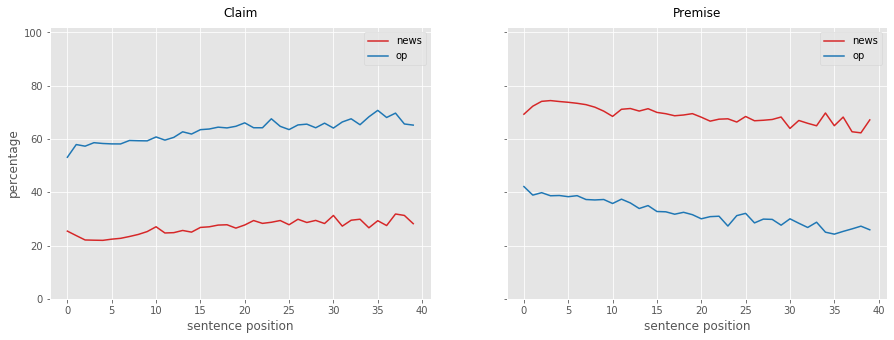

In [16]:
draw_two_plot(n_articles=0, n_sent=40, save_fig=True, fig_name='claim_premise_all_two_legends')

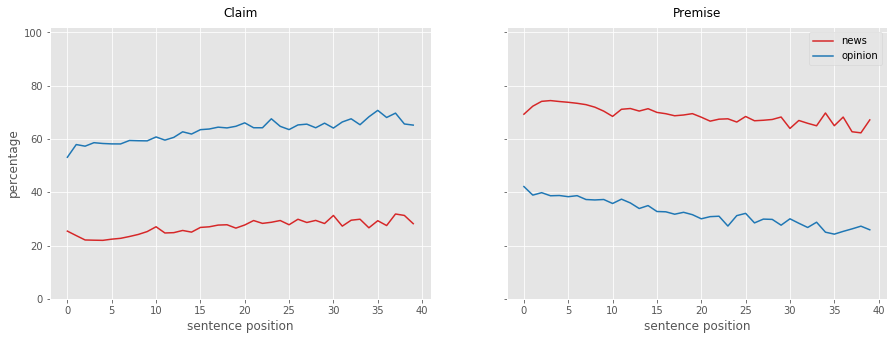

In [49]:
draw_two_plot(n_articles=0, n_sent=40, save_fig=True, fig_name='claim_premise_all')

### Plotting

In [18]:
data['news']['claim'].keys(),len(data['news']['claim']['Californian']),len(data['news']['claim']['Californian'][0])

(dict_keys(['Californian', 'Digital Journal', 'Enid News', 'Gazette-mail', 'NJSpotlight', 'NW Florida Daily', 'New York Times', 'Press Democrat', 'Washington Observer Report', 'washington post']),
 363,
 60)

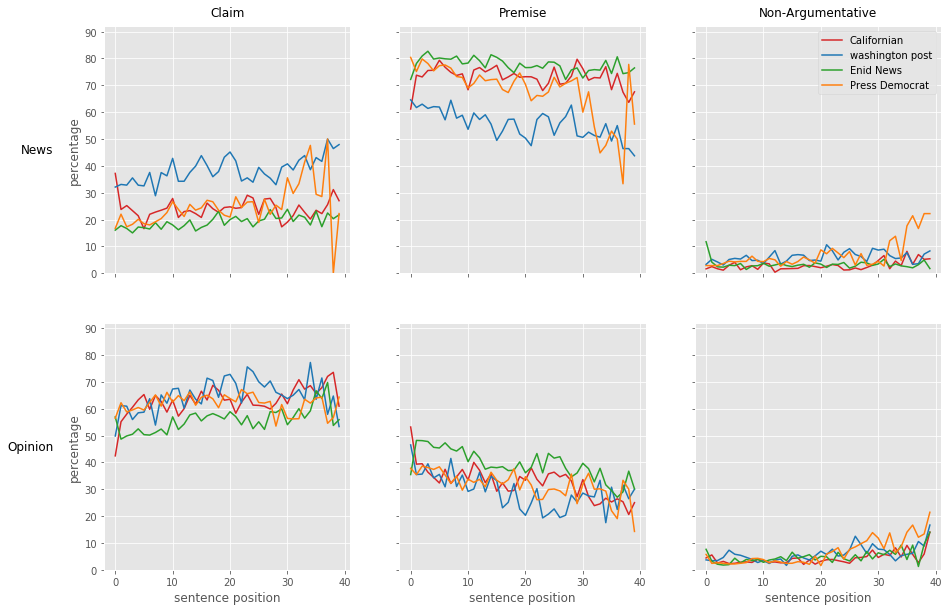

In [43]:
draw_plot(['Californian','washington post', 'Enid News', 'Press Democrat'], y_axis_max=90, n_y_ticks=9, n_articles=0, n_sent=40)

In [ ]:
draw_plot(['Californian','washington post', 'Enid News', 'Press Democrat'], y_axis_max=90, n_y_ticks=9, n_articles=0, n_sent=40, save_fig=True, fig_name='cal_wp_en_pd',)

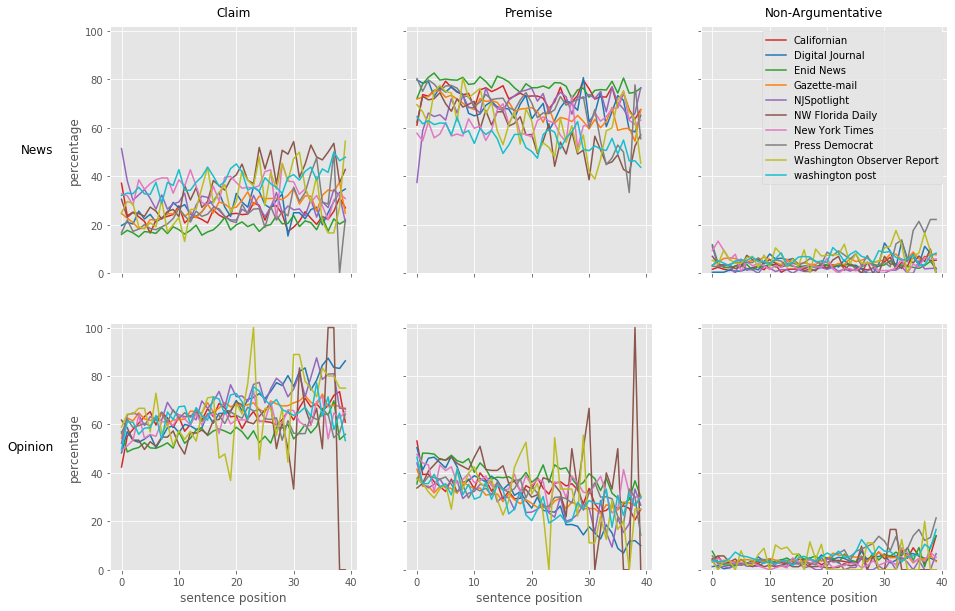

In [42]:
draw_plot(n_articles=0, n_sent=40)

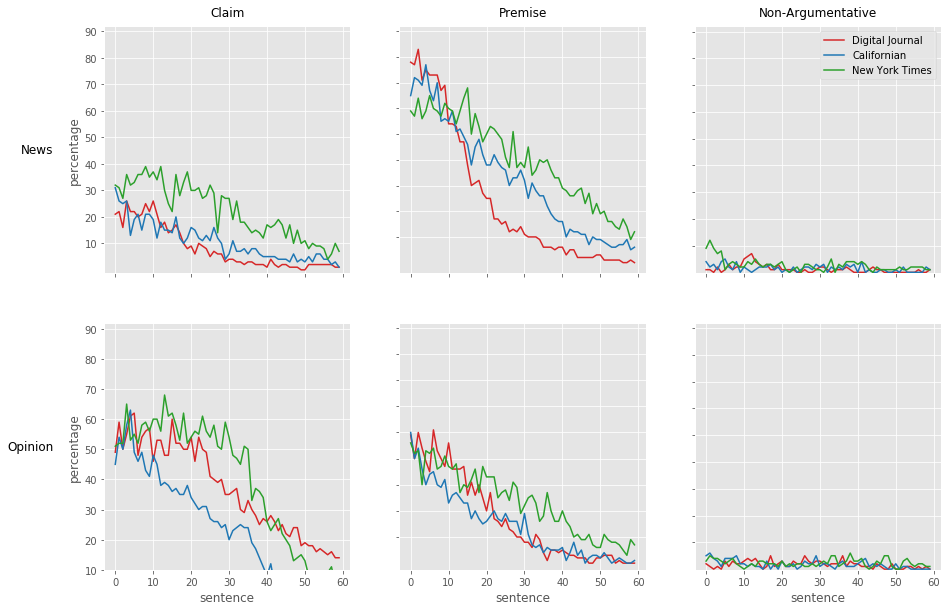

In [29]:
draw_plot(['Digital Journal', 'Californian','New York Times'], y_axis_max=90, n_y_ticks=9, save_fig=True, fig_name='dj_cal_nyt')

## Archive

In [ ]:
x=np.arange(6)
 
fig=plt.figure()
ax=fig.add_subplot(111)
 
ax.plot(x,x,c='b',marker="^",ls='--',label='Greedy',fillstyle='none')
ax.plot(x,x+1,c='g',marker=(8,2,0),ls='--',label='Greedy Heuristic')
ax.plot(x,(x+1)**2,c='k',ls='-',label='Random')
ax.plot(x,(x-1)**2,c='r',marker="v",ls='-',label='GMC')
ax.plot(x,x**2-1,c='m',marker="o",ls='--',label='KSTW',fillstyle='none')
ax.plot(x,x-1,c='k',marker="+",ls=':',label='DGYC')
 
plt.legend(loc=2)
plt.show()